# This notebook extracts the density field of the 256 grid from the simulation tables

In [9]:
# imports packages
from __future__ import print_function 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
#import csv
import random
import scipy.integrate as integrate
from numpy import genfromtxt
from random import randrange
from numpy.polynomial import Polynomial as P
from IPython.display import Latex


## Main steps

In [4]:
%run FRBProject-Chap1-ParametersAndFunctions.ipynb

### Have to hardcode z=0 table because of the unique column names

In [2]:
# reading density field and halos data
pdDens=pd.read_csv('dens256-z-0.csv.gz')


# extracting columns
pdDensN=pdDens[['Bolshoi__Dens256_z0__ix','Bolshoi__Dens256_z0__iy','Bolshoi__Dens256_z0__iz','Bolshoi__Dens256_z0__dens']]


# 3D density array
pdDensN=pdDensN.sort_values(['Bolshoi__Dens256_z0__ix','Bolshoi__Dens256_z0__iy','Bolshoi__Dens256_z0__iz'])
tden = pdDensN['Bolshoi__Dens256_z0__dens'].values
tden2=np.reshape(tden,(256,256,256))


# extracting columns
pdDensN=pdDens[['Bolshoi__Dens256_z0__ix','Bolshoi__Dens256_z0__iy','Bolshoi__Dens256_z0__iz','Bolshoi__Dens256_z0__dens']]



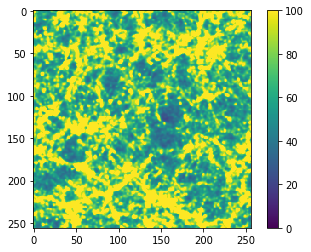

In [5]:
# status: looks good, can see the cosmic web of halos and strings
# image plot of the given density field


orig_den_256= ((tden2+1).sum(2))*10**6* dx* elecD(z) /(1+z)**2
# plt.imshow(orig_den_256,vmin=0,vmax=100)
# plt.colorbar()
# plt.show()
#print('The file name is: ', str(orig_den_256))

# Function to import density and halo tables for a given redshift

In [21]:
def import_density_field_256(redshift):
    name = 'dens256-z-0.'+str(redshift)+'.csv.gz'
    den = pd.read_csv(name)
    den2=den[['Bolshoi__Dens256__ix','Bolshoi__Dens256__iy','Bolshoi__Dens256__iz','Bolshoi__Dens256__dens']]


    # 3D density array
    den_sorted=den2.sort_values(['Bolshoi__Dens256__ix','Bolshoi__Dens256__iy','Bolshoi__Dens256__iz'])
    den_vals = den_sorted['Bolshoi__Dens256__dens'].values
    den256=np.reshape(den_vals,(256,256,256))
    
    
    
    return normDM((den256+1).sum(2),0)
#     return normDM((den256+1).sum(random.randint(0,1)),0)


    

# Create a single array of density fields for various redshifts

In [465]:
# Density fields: Choose 256 or 512 field

def extract_all_den_fields(RS_array,den_grid_size):


    all_den_fields = np.zeros([len(RS_array),den_grid_size,den_grid_size])

    if den_grid_size == 256:
        all_den_fields[0,:,:] = orig_den_256
    elif den_grid_size == 512:
        all_den_fields[0,:,:] = orig_den_512

    for i in range(1, len(RS_array)):
        if den_grid_size == 256:
            all_den_fields[i,:,:]=import_density_field_256(i)
        elif den_grid_size == 512:
            all_den_fields[i,:,:]=import_density_field_512(i)
    
    return all_den_fields 
    
    
    
    